## Actions

Implement a model in Jupyter Notebook and discuss the following topics:
 - Describe the problem
   - What is the problem? 
   - What is the type of machine learning?
   - What are the feature variables and target variables?
 - Data exploration and preprocessing
   - How did you explore the data?
   - How did you clean the data (are there missing or invalid values)?
 - Modeling
   - Split 20% data as the test set using the random status 123.
   - What machine learning algorithms were used? Which is better?
   - What evaluation metric do you prefer?
   - How did you evaluate model's performance? 
   - How did you diagnose the model? Is it overfitting, under fitting, or good fitting?
 - Results and discussion
   - What is your model's results? Is it good? Do you have any concerns?

## Describe the problem

### What is the problem?
In our data file, we are given a target value, which is whether a customer or not defaulted. To train our model, we are given parameters relevant to the customer's account and demographics, like credit limit, bill statements by month, past payment history, and more. In total, we started with 23 raw variables as features, and using this we are attempting to find the likelihood of a customer defaulting on their account.

### What is the type of machine learning?

We determined that the type of machine learning is supervised, as we are using data to train or supervise an algorithm in order to figure out the likelihood of a customer defaulting.

### What are the feature variables?

X1: This variable is the amount of credit given to the customer, the total line of credit.

X2: This is a binary variable classifying whether the customer is male or female.

X3: This is a categorical variable classifying the education level of the customer. 1 corresponds to graduate school, 2 corresponds to university, 3 corresponds to high school, 4 corresponds to anything else.

X4: This is a categorical variable the classifies the marital status of the customer, 1 corresponding to married, 2 corresponding to single, 3 corresponding to anything else.

X5: This is a numerical integer value that corresponds to a customer's age.

X6-X11: These are a group of categorical values that correspond to a customer's history of past payment. -1 corresponds to properly paying every month, or "pay duly", 1-8 corresponds to 1-8 month delay in payments (ex. 6 is 6 month delay in payments), 9 corresponds to 9 months and anything above. X6 begins in September 2005, and ends with X11 at April 2005, iterating backwards monthly.

X12-X17: These are group of numerical values that correspond to a monthly balance on a customer's account. If this variable was 500, for example, then the customer owed 500 that month.

X18-X23: These are a group of numerical values that correspond to the amount of payment the month previous. X18 corresponds to amount paid in September 2005, and iterates monthly backwards until X23 corresponds to April, 2005.

Target Variable: This is a binary variable, corresponding to whether or not a customer defaulted. 1 will correspond to a default, 0 corresponds to not default.

## Data Exploration and Preprocessing

### How did we explore the data?

#### Preprocessing

We begin analyzing the data by importing it from the server containing the data, as well as checking the head, or the 5 initial entries, to see how the data is formatted and get an understanding for what we're working with. In this case we also relabeled the data in order to make it more readable.

In [3]:
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv', header=0)

df.rename(columns ={'X1' : 'Credit',
                   'X2' : 'SEX',
                   'X3' : 'Education',
                   'X4' : 'Marital_Stat',
                   'X5' : 'Age',
                   'X6' : 'R_Stat Sep-05',
                   'X7' : 'R_Stat Aug-05',
                   'X8' : 'R_Stat Jul-05',
                   'X9' : 'R_Stat Jun-05',
                   'X10' : 'R_Stat May-05',
                   'X11' : 'R_Stat Apr-05',
                   'X12' : 'STMT_BAL Sep-05',
                   'X13' : 'STMT_BAL Aug-05',
                   'X14' : 'STMT_BAL Jul-05',
                   'X15' : 'STMT_BAL Jun-05',
                   'X16' : 'STMT_BAL May-05',
                   'X17' : 'STMT_BAL Apr-05',
                   'X18' : 'Prev_Pmt Sep-05',
                   'X19' : 'Prev_Pmt Aug-05',
                   'X20' : 'Prev_Pmt Jul-05',
                   'X21' : 'Prev_Pmt Jun-05',
                   'X22' : 'Prev_Pmt May-05',
                   'X23' : 'Prev_Pmt Apr-05',
                   'Y' : 'Default'},
         inplace = True)



df.head()


,ID,Credit,SEX,Education,Marital_Stat,Age,R_Stat Sep-05,R_Stat Aug-05,R_Stat Jul-05,R_Stat Jun-05,...,STMT_BAL Jun-05,STMT_BAL May-05,STMT_BAL Apr-05,Prev_Pmt Sep-05,Prev_Pmt Aug-05,Prev_Pmt Jul-05,Prev_Pmt Jun-05,Prev_Pmt May-05,Prev_Pmt Apr-05,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Next, we called the info() function in order to get an understanding of the datatypes for each feature, as well as check for any null values, as we want to guarantee there are none. We also check the shape of the dataframe to see how many entries we have.

In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               30000 non-null  int64
 1   Credit           30000 non-null  int64
 2   SEX              30000 non-null  int64
 3   Education        30000 non-null  int64
 4   Marital_Stat     30000 non-null  int64
 5   Age              30000 non-null  int64
 6   R_Stat Sep-05    30000 non-null  int64
 7   R_Stat Aug-05    30000 non-null  int64
 8   R_Stat Jul-05    30000 non-null  int64
 9   R_Stat Jun-05    30000 non-null  int64
 10  R_Stat May-05    30000 non-null  int64
 11  R_Stat Apr-05    30000 non-null  int64
 12  STMT_BAL Sep-05  30000 non-null  int64
 13  STMT_BAL Aug-05  30000 non-null  int64
 14  STMT_BAL Jul-05  30000 non-null  int64
 15  STMT_BAL Jun-05  30000 non-null  int64
 16  STMT_BAL May-05  30000 non-null  int64
 17  STMT_BAL Apr-05  30000 non-null  int64
 18  Prev_P

(30000, 25)

Since there are 30,000 entries in our list and all parameters list 30,000 non-null entries, we guarantee that there are no null entries in our list.

We identified no need to further preprocess any categorized data, 

We then split our data into explicit X and y variables, used this to split the data into 20% testing data and 80% training data, and then from there used a standard scaler in order to standardize the data.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.iloc[:, :23].values, df.iloc[:, 24].values


In [26]:
from sklearn import datasets
from sklearn.decomposition import PCA

# Split data into 80% train 20% test with a Random State of 123
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,  
                     test_size=0.20,
                     stratify=y,
                     random_state=55151677)

# Standardizing Data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


[[0.80144974 0.59806214]
 [0.59806214 0.80144974]]


#### Exploring the data

We used multiple methods to explore our data. First, we used the heatmap functions to determine if there were any interesting correlations between our features.

We began with our target, along with credit limit, age, marital status, and sex of the customer.

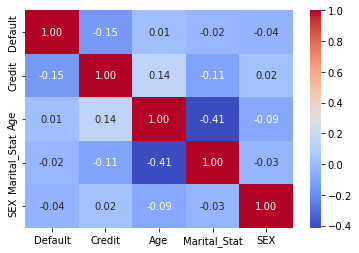

In [28]:
import seaborn as sns
g = sns.heatmap(df[['Default', 'Credit', 'Age' , 'Marital_Stat', 'SEX']].corr(),annot=True, fmt =".2f", 
                cmap = "coolwarm") 

We note that other than the fairly negative correlation between marital status and age (lower marital status means married, so a higher age being more likely to have a higher chance of being married), there are not many other strong correlations. 

There is a slight negative correlation between credit and default status, meaning, although very slightly, the lower your credit limit the more likely your default status is to be 1, or positive.

After this, took a look at a heat map across statement balances.

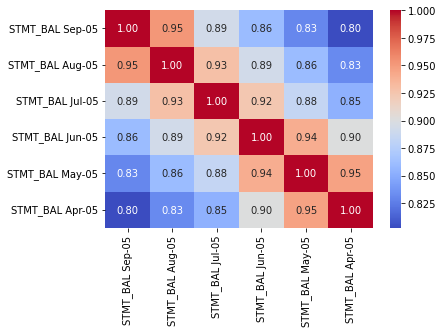

In [29]:
g = sns.heatmap(df[['STMT_BAL Sep-05', 'STMT_BAL Aug-05', 'STMT_BAL Jul-05', 'STMT_BAL Jun-05', 
                    'STMT_BAL May-05', 'STMT_BAL Apr-05']].corr(),annot=True, fmt =".2f", cmap = "coolwarm") 

We notice that there is typically a very strong positive correlation between balances month to month, meaning if you have a high balance the previous month, you are very likely to have a high balance the current month. This correlation drops off with the distance between months, meaning two months is less correlated than one month, three less than two, etc.

On our next heat map, we took a look at the month to month correlation between previous month payments.

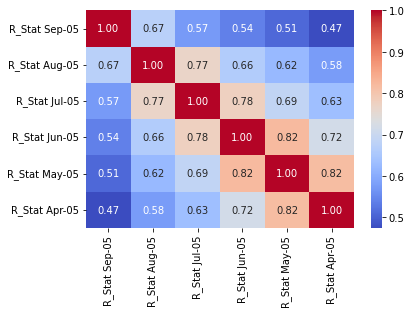

In [30]:
g = sns.heatmap(df[['R_Stat Sep-05', 'R_Stat Aug-05', 'R_Stat Jul-05', 'R_Stat Jun-05',
                    'R_Stat May-05', 'R_Stat Apr-05']].corr(),annot=True, fmt =".2f", cmap = "coolwarm")

This heat map looks fairly similar to the previous heat map, in that there is typically a positive month to month correlation between previous monthly payments, however we note that it is not nearly as strong as the previous heat map.

Next, we plot our credit limits across sexes to see what the distribution looks like.